In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [5]:
# Téléchargement des données
(X_train_data,Y_train_data),(X_test_data,Y_test_data) = mnist.load_data()
N = X_train_data.shape[0] # N = 60 000 données

In [12]:
# Données d'apprentissage X
X_train = np.reshape(X_train_data,(N,784)) # vecteur image
# X_train.max()
X_train = X_train/255 # normalisation
# X_train.max()

1.0

In [15]:
Y_train_data.shape

(60000,)

In [16]:
# Données d'apprentissage Y vers une liste de taille 10
Y_train = to_categorical(Y_train_data, num_classes=10)

In [18]:
Y_train.shape

(60000, 10)

In [19]:
# Données de test
X_test = np.reshape(X_test_data,(X_test_data.shape[0],784))
X_test = X_test/255
Y_test = to_categorical(Y_test_data, num_classes=10)

In [20]:
### Partie B - Le réseau de neurones
p = 8
modele = Sequential()

In [22]:
# dir(modele)

In [23]:
# Première couche : p neurones (entrée de dimension 784 = 28x28)
modele.add(Dense(p, input_dim=784, activation='sigmoid'))

In [24]:
# Deuxième couche : p neurones
modele.add(Dense(p, activation='sigmoid'))

In [25]:
# Couche de sortie : 1O neurones (un par chiffre)
modele.add(Dense(10, activation='softmax'))

In [26]:
# Choix de la méthode de descente de gradient
modele.compile(loss='categorical_crossentropy',
optimizer='sgd',
metrics=['accuracy'])
print(modele.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 6280      
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 10)                90        
                                                                 
Total params: 6,442
Trainable params: 6,442
Non-trainable params: 0
_________________________________________________________________
None


In [27]:
### Partie C - Calcul des poids par descente de gradient
modele.fit(X_train, Y_train, batch_size=32, epochs=40)

Epoch 1/40
1875/1875 [==============================] - 13s 6ms/step - loss: 2.2848 - accuracy: 0.1803
Epoch 2/40
1875/1875 [==============================] - 10s 5ms/step - loss: 2.1819 - accuracy: 0.3471
Epoch 3/40
1875/1875 [==============================] - 11s 6ms/step - loss: 2.0179 - accuracy: 0.3826
Epoch 4/40
1875/1875 [==============================] - 10s 5ms/step - loss: 1.8148 - accuracy: 0.4502
Epoch 5/40
1875/1875 [==============================] - 11s 6ms/step - loss: 1.6126 - accuracy: 0.5334
Epoch 6/40
1875/1875 [==============================] - 11s 6ms/step - loss: 1.4286 - accuracy: 0.5895
Epoch 7/40
1875/1875 [==============================] - 11s 6ms/step - loss: 1.2790 - accuracy: 0.6329
Epoch 8/40
1875/1875 [==============================] - 11s 6ms/step - loss: 1.1648 - accuracy: 0.6607
Epoch 9/40
1875/1875 [==============================] - 13s 7ms/step - loss: 1.0738 - accuracy: 0.6909
Epoch 10/40
1875/1875 [==============================] - 12s 6ms/step - l

In [28]:
### Partie D - Résultats
resultat = modele.evaluate(X_test, Y_test, verbose=0)
print('Valeur de l''erreur sur les données de test (loss):', resultat[0])
print('Précision sur les données de test (accuracy):', resultat[1])

Valeur de lerreur sur les données de test (loss): 0.35864102840423584
Précision sur les données de test (accuracy): 0.907800018787384


In [29]:
# Prédiction sur les données de test
Y_predict = modele.predict(X_test)

313/313 [==============================] - 2s 5ms/step


In [31]:
# Y_predict

Sortie réseau [3.0774653e-01 4.6204226e-04 2.7466156e-02 5.5737642e-04 1.7923959e-02
 1.1231221e-01 5.2753806e-01 1.6702119e-04 4.0318226e-03 1.7948184e-03]
Chiffre attendu : 5
Chiffre prédit : 6


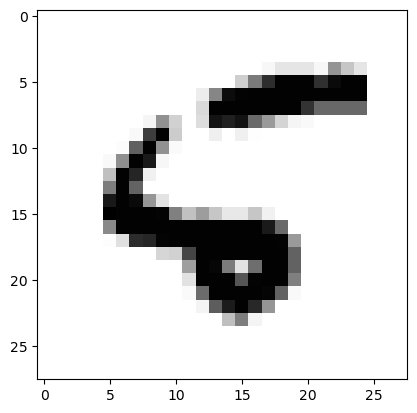

In [35]:
# Un exemple
i = 8 # numéro de l'image
chiffre_predit = np.argmax(Y_predict[i]) # prédiction par le réseau
print("Sortie réseau", Y_predict[i])
print("Chiffre attendu :", Y_test_data[i])
print("Chiffre prédit :", chiffre_predit)
plt.imshow(X_test_data[i], cmap='Greys')
plt.show()

In [36]:
# Partie A. Données
# Fonction à approcher
def f(x):
    return np.cos(2*x) + x*np.sin(3*x) + x**0.5 - 2

In [37]:
a, b = 0, 5 # intervalle [a,b]
N = 100 # taille des données
X = np.linspace(a, b, N) # abscisses
Y = f(X) # ordonnées
X_train = X.reshape(-1,1)
Y_train = Y.reshape(-1,1)

In [43]:
X_train.shape

(100, 1)

In [44]:
# Partie B. Réseau
modele = Sequential()
p = 10
modele.add(Dense(p, input_dim=1, activation='tanh'))
modele.add(Dense(p, activation='tanh'))
modele.add(Dense(p, activation='tanh'))
modele.add(Dense(p, activation='tanh'))
modele.add(Dense(1, activation='linear'))

In [50]:
# Méthode de gradient : descente de gradient classique améliorée
mysgd = optimizers.SGD(lr=0.001, decay=1e-7, momentum=0.9, nesterov=True)
modele.compile(loss='mean_squared_error', optimizer=mysgd)
print(modele.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                20        
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
 dense_6 (Dense)             (None, 10)                110       
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________
None


In [46]:
# Partie C. Apprentissage
history = modele.fit(X_train, Y_train, epochs=4000, batch_size=N)

Epoch 1/4000
1/1 [==============================] - 2s 2s/step - loss: 4.8841
Epoch 2/4000
1/1 [==============================] - 0s 38ms/step - loss: 4.8789
Epoch 3/4000
1/1 [==============================] - 0s 36ms/step - loss: 4.8717
Epoch 4/4000
1/1 [==============================] - 0s 26ms/step - loss: 4.8632
Epoch 5/4000
1/1 [==============================] - 0s 54ms/step - loss: 4.8537
Epoch 6/4000
1/1 [==============================] - 0s 24ms/step - loss: 4.8436
Epoch 7/4000
1/1 [==============================] - 0s 21ms/step - loss: 4.8332
Epoch 8/4000
1/1 [==============================] - 0s 17ms/step - loss: 4.8226
Epoch 9/4000
1/1 [==============================] - 0s 15ms/step - loss: 4.8119
Epoch 10/4000
1/1 [==============================] - 0s 28ms/step - loss: 4.8011
Epoch 11/4000
1/1 [==============================] - 0s 19ms/step - loss: 4.7902
Epoch 12/4000
1/1 [==============================] - 0s 20ms/step - loss: 4.7791
Epoch 13/4000
1/1 [====================

1/1 [==============================] - 0s 61ms/step - loss: 4.1177
Epoch 103/4000
1/1 [==============================] - 0s 29ms/step - loss: 4.1159
Epoch 104/4000
1/1 [==============================] - 0s 17ms/step - loss: 4.1141
Epoch 105/4000
1/1 [==============================] - 0s 19ms/step - loss: 4.1123
Epoch 106/4000
1/1 [==============================] - 0s 15ms/step - loss: 4.1106
Epoch 107/4000
1/1 [==============================] - 0s 11ms/step - loss: 4.1089
Epoch 108/4000
1/1 [==============================] - 0s 17ms/step - loss: 4.1072
Epoch 109/4000
1/1 [==============================] - 0s 13ms/step - loss: 4.1056
Epoch 110/4000
1/1 [==============================] - 0s 13ms/step - loss: 4.1039
Epoch 111/4000
1/1 [==============================] - 0s 12ms/step - loss: 4.1023
Epoch 112/4000
1/1 [==============================] - 0s 13ms/step - loss: 4.1007
Epoch 113/4000
1/1 [==============================] - 0s 12ms/step - loss: 4.0992
Epoch 114/4000
1/1 [===========

1/1 [==============================] - 0s 27ms/step - loss: 3.9958
Epoch 203/4000
1/1 [==============================] - 0s 13ms/step - loss: 3.9949
Epoch 204/4000
1/1 [==============================] - 0s 16ms/step - loss: 3.9939
Epoch 205/4000
1/1 [==============================] - 0s 13ms/step - loss: 3.9929
Epoch 206/4000
1/1 [==============================] - 0s 14ms/step - loss: 3.9920
Epoch 207/4000
1/1 [==============================] - 0s 11ms/step - loss: 3.9910
Epoch 208/4000
1/1 [==============================] - 0s 11ms/step - loss: 3.9901
Epoch 209/4000
1/1 [==============================] - 0s 28ms/step - loss: 3.9891
Epoch 210/4000
1/1 [==============================] - 0s 16ms/step - loss: 3.9882
Epoch 211/4000
1/1 [==============================] - 0s 32ms/step - loss: 3.9872
Epoch 212/4000
1/1 [==============================] - 0s 29ms/step - loss: 3.9863
Epoch 213/4000
1/1 [==============================] - 0s 21ms/step - loss: 3.9853
Epoch 214/4000
1/1 [===========

1/1 [==============================] - 0s 17ms/step - loss: 3.9189
Epoch 303/4000
1/1 [==============================] - 0s 22ms/step - loss: 3.9183
Epoch 304/4000
1/1 [==============================] - 0s 17ms/step - loss: 3.9178
Epoch 305/4000
1/1 [==============================] - 0s 14ms/step - loss: 3.9173
Epoch 306/4000
1/1 [==============================] - 0s 18ms/step - loss: 3.9168
Epoch 307/4000
1/1 [==============================] - 0s 14ms/step - loss: 3.9163
Epoch 308/4000
1/1 [==============================] - 0s 15ms/step - loss: 3.9157
Epoch 309/4000
1/1 [==============================] - 0s 25ms/step - loss: 3.9152
Epoch 310/4000
1/1 [==============================] - 0s 16ms/step - loss: 3.9147
Epoch 311/4000
1/1 [==============================] - 0s 16ms/step - loss: 3.9142
Epoch 312/4000
1/1 [==============================] - 0s 15ms/step - loss: 3.9137
Epoch 313/4000
1/1 [==============================] - 0s 14ms/step - loss: 3.9133
Epoch 314/4000
1/1 [===========

1/1 [==============================] - 0s 12ms/step - loss: 3.8800
Epoch 403/4000
1/1 [==============================] - 0s 12ms/step - loss: 3.8797
Epoch 404/4000
1/1 [==============================] - 0s 12ms/step - loss: 3.8794
Epoch 405/4000
1/1 [==============================] - 0s 23ms/step - loss: 3.8792
Epoch 406/4000
1/1 [==============================] - 0s 15ms/step - loss: 3.8789
Epoch 407/4000
1/1 [==============================] - 0s 12ms/step - loss: 3.8786
Epoch 408/4000
1/1 [==============================] - 0s 31ms/step - loss: 3.8783
Epoch 409/4000
1/1 [==============================] - 0s 14ms/step - loss: 3.8780
Epoch 410/4000
1/1 [==============================] - 0s 17ms/step - loss: 3.8777
Epoch 411/4000
1/1 [==============================] - 0s 12ms/step - loss: 3.8774
Epoch 412/4000
1/1 [==============================] - 0s 13ms/step - loss: 3.8772
Epoch 413/4000
1/1 [==============================] - 0s 12ms/step - loss: 3.8769
Epoch 414/4000
1/1 [===========

1/1 [==============================] - 0s 195ms/step - loss: 3.8555
Epoch 503/4000
1/1 [==============================] - 0s 81ms/step - loss: 3.8553
Epoch 504/4000
1/1 [==============================] - 0s 107ms/step - loss: 3.8551
Epoch 505/4000
1/1 [==============================] - 0s 66ms/step - loss: 3.8549
Epoch 506/4000
1/1 [==============================] - 0s 33ms/step - loss: 3.8547
Epoch 507/4000
1/1 [==============================] - 0s 19ms/step - loss: 3.8545
Epoch 508/4000
1/1 [==============================] - 0s 44ms/step - loss: 3.8543
Epoch 509/4000
1/1 [==============================] - 0s 123ms/step - loss: 3.8541
Epoch 510/4000
1/1 [==============================] - 0s 109ms/step - loss: 3.8539
Epoch 511/4000
1/1 [==============================] - 0s 34ms/step - loss: 3.8537
Epoch 512/4000
1/1 [==============================] - 0s 22ms/step - loss: 3.8535
Epoch 513/4000
1/1 [==============================] - 0s 58ms/step - loss: 3.8533
Epoch 514/4000
1/1 [=======

1/1 [==============================] - 0s 14ms/step - loss: 3.8361
Epoch 603/4000
1/1 [==============================] - 0s 15ms/step - loss: 3.8359
Epoch 604/4000
1/1 [==============================] - 0s 18ms/step - loss: 3.8357
Epoch 605/4000
1/1 [==============================] - 0s 14ms/step - loss: 3.8355
Epoch 606/4000
1/1 [==============================] - 0s 13ms/step - loss: 3.8353
Epoch 607/4000
1/1 [==============================] - 0s 13ms/step - loss: 3.8351
Epoch 608/4000
1/1 [==============================] - 0s 26ms/step - loss: 3.8350
Epoch 609/4000
1/1 [==============================] - 0s 13ms/step - loss: 3.8348
Epoch 610/4000
1/1 [==============================] - 0s 14ms/step - loss: 3.8346
Epoch 611/4000
1/1 [==============================] - 0s 13ms/step - loss: 3.8344
Epoch 612/4000
1/1 [==============================] - 0s 14ms/step - loss: 3.8342
Epoch 613/4000
1/1 [==============================] - 0s 12ms/step - loss: 3.8340
Epoch 614/4000
1/1 [===========

1/1 [==============================] - 0s 29ms/step - loss: 3.8179
Epoch 703/4000
1/1 [==============================] - 0s 64ms/step - loss: 3.8177
Epoch 704/4000
1/1 [==============================] - 0s 15ms/step - loss: 3.8176
Epoch 705/4000
1/1 [==============================] - 0s 15ms/step - loss: 3.8174
Epoch 706/4000
1/1 [==============================] - 0s 23ms/step - loss: 3.8172
Epoch 707/4000
1/1 [==============================] - 0s 58ms/step - loss: 3.8170
Epoch 708/4000
1/1 [==============================] - 0s 22ms/step - loss: 3.8168
Epoch 709/4000
1/1 [==============================] - 0s 22ms/step - loss: 3.8166
Epoch 710/4000
1/1 [==============================] - 0s 23ms/step - loss: 3.8165
Epoch 711/4000
1/1 [==============================] - 0s 48ms/step - loss: 3.8163
Epoch 712/4000
1/1 [==============================] - 0s 15ms/step - loss: 3.8161
Epoch 713/4000
1/1 [==============================] - 0s 15ms/step - loss: 3.8159
Epoch 714/4000
1/1 [===========

1/1 [==============================] - 0s 36ms/step - loss: 3.7989
Epoch 803/4000
1/1 [==============================] - 0s 17ms/step - loss: 3.7987
Epoch 804/4000
1/1 [==============================] - 0s 20ms/step - loss: 3.7985
Epoch 805/4000
1/1 [==============================] - 0s 15ms/step - loss: 3.7983
Epoch 806/4000
1/1 [==============================] - 0s 25ms/step - loss: 3.7981
Epoch 807/4000
1/1 [==============================] - 0s 23ms/step - loss: 3.7979
Epoch 808/4000
1/1 [==============================] - 0s 45ms/step - loss: 3.7977
Epoch 809/4000
1/1 [==============================] - 0s 16ms/step - loss: 3.7975
Epoch 810/4000
1/1 [==============================] - 0s 14ms/step - loss: 3.7973
Epoch 811/4000
1/1 [==============================] - 0s 13ms/step - loss: 3.7971
Epoch 812/4000
1/1 [==============================] - 0s 28ms/step - loss: 3.7969
Epoch 813/4000
1/1 [==============================] - 0s 15ms/step - loss: 3.7967
Epoch 814/4000
1/1 [===========

1/1 [==============================] - 0s 19ms/step - loss: 3.7770
Epoch 903/4000
1/1 [==============================] - 0s 14ms/step - loss: 3.7767
Epoch 904/4000
1/1 [==============================] - 0s 14ms/step - loss: 3.7765
Epoch 905/4000
1/1 [==============================] - 0s 12ms/step - loss: 3.7763
Epoch 906/4000
1/1 [==============================] - 0s 11ms/step - loss: 3.7760
Epoch 907/4000
1/1 [==============================] - 0s 15ms/step - loss: 3.7758
Epoch 908/4000
1/1 [==============================] - 0s 12ms/step - loss: 3.7755
Epoch 909/4000
1/1 [==============================] - 0s 19ms/step - loss: 3.7753
Epoch 910/4000
1/1 [==============================] - 0s 11ms/step - loss: 3.7750
Epoch 911/4000
1/1 [==============================] - 0s 11ms/step - loss: 3.7748
Epoch 912/4000
1/1 [==============================] - 0s 12ms/step - loss: 3.7745
Epoch 913/4000
1/1 [==============================] - 0s 12ms/step - loss: 3.7743
Epoch 914/4000
1/1 [===========

1/1 [==============================] - 0s 11ms/step - loss: 3.7489
Epoch 1003/4000
1/1 [==============================] - 0s 19ms/step - loss: 3.7486
Epoch 1004/4000
1/1 [==============================] - 0s 13ms/step - loss: 3.7483
Epoch 1005/4000
1/1 [==============================] - 0s 12ms/step - loss: 3.7479
Epoch 1006/4000
1/1 [==============================] - 0s 12ms/step - loss: 3.7476
Epoch 1007/4000
1/1 [==============================] - 0s 22ms/step - loss: 3.7473
Epoch 1008/4000
1/1 [==============================] - 0s 12ms/step - loss: 3.7469
Epoch 1009/4000
1/1 [==============================] - 0s 12ms/step - loss: 3.7466
Epoch 1010/4000
1/1 [==============================] - 0s 11ms/step - loss: 3.7463
Epoch 1011/4000
1/1 [==============================] - 0s 17ms/step - loss: 3.7459
Epoch 1012/4000
1/1 [==============================] - 0s 15ms/step - loss: 3.7456
Epoch 1013/4000
1/1 [==============================] - 0s 24ms/step - loss: 3.7453
Epoch 1014/4000
1/1 

1/1 [==============================] - 0s 12ms/step - loss: 3.7104
Epoch 1101/4000
1/1 [==============================] - 0s 13ms/step - loss: 3.7099
Epoch 1102/4000
1/1 [==============================] - 0s 12ms/step - loss: 3.7094
Epoch 1103/4000
1/1 [==============================] - 0s 12ms/step - loss: 3.7090
Epoch 1104/4000
1/1 [==============================] - 0s 14ms/step - loss: 3.7085
Epoch 1105/4000
1/1 [==============================] - 0s 12ms/step - loss: 3.7080
Epoch 1106/4000
1/1 [==============================] - 0s 12ms/step - loss: 3.7075
Epoch 1107/4000
1/1 [==============================] - 0s 20ms/step - loss: 3.7070
Epoch 1108/4000
1/1 [==============================] - 0s 12ms/step - loss: 3.7065
Epoch 1109/4000
1/1 [==============================] - 0s 12ms/step - loss: 3.7060
Epoch 1110/4000
1/1 [==============================] - 0s 14ms/step - loss: 3.7056
Epoch 1111/4000
1/1 [==============================] - 0s 12ms/step - loss: 3.7051
Epoch 1112/4000
1/1 

1/1 [==============================] - 0s 18ms/step - loss: 3.6521
Epoch 1199/4000
1/1 [==============================] - 0s 14ms/step - loss: 3.6513
Epoch 1200/4000
1/1 [==============================] - 0s 18ms/step - loss: 3.6506
Epoch 1201/4000
1/1 [==============================] - 0s 15ms/step - loss: 3.6498
Epoch 1202/4000
1/1 [==============================] - 0s 19ms/step - loss: 3.6491
Epoch 1203/4000
1/1 [==============================] - 0s 15ms/step - loss: 3.6483
Epoch 1204/4000
1/1 [==============================] - 0s 13ms/step - loss: 3.6475
Epoch 1205/4000
1/1 [==============================] - 0s 14ms/step - loss: 3.6468
Epoch 1206/4000
1/1 [==============================] - 0s 24ms/step - loss: 3.6460
Epoch 1207/4000
1/1 [==============================] - 0s 12ms/step - loss: 3.6452
Epoch 1208/4000
1/1 [==============================] - 0s 42ms/step - loss: 3.6444
Epoch 1209/4000
1/1 [==============================] - 0s 33ms/step - loss: 3.6436
Epoch 1210/4000
1/1 

1/1 [==============================] - 0s 13ms/step - loss: 3.5536
Epoch 1297/4000
1/1 [==============================] - 0s 14ms/step - loss: 3.5523
Epoch 1298/4000
1/1 [==============================] - 0s 12ms/step - loss: 3.5509
Epoch 1299/4000
1/1 [==============================] - 0s 14ms/step - loss: 3.5495
Epoch 1300/4000
1/1 [==============================] - 0s 19ms/step - loss: 3.5481
Epoch 1301/4000
1/1 [==============================] - 0s 20ms/step - loss: 3.5467
Epoch 1302/4000
1/1 [==============================] - 0s 20ms/step - loss: 3.5453
Epoch 1303/4000
1/1 [==============================] - 0s 29ms/step - loss: 3.5439
Epoch 1304/4000
1/1 [==============================] - 0s 14ms/step - loss: 3.5425
Epoch 1305/4000
1/1 [==============================] - 0s 15ms/step - loss: 3.5410
Epoch 1306/4000
1/1 [==============================] - 0s 14ms/step - loss: 3.5396
Epoch 1307/4000
1/1 [==============================] - 0s 13ms/step - loss: 3.5381
Epoch 1308/4000
1/1 

1/1 [==============================] - 0s 16ms/step - loss: 3.3555
Epoch 1395/4000
1/1 [==============================] - 0s 16ms/step - loss: 3.3526
Epoch 1396/4000
1/1 [==============================] - 0s 22ms/step - loss: 3.3496
Epoch 1397/4000
1/1 [==============================] - 0s 14ms/step - loss: 3.3466
Epoch 1398/4000
1/1 [==============================] - 0s 16ms/step - loss: 3.3435
Epoch 1399/4000
1/1 [==============================] - 0s 15ms/step - loss: 3.3405
Epoch 1400/4000
1/1 [==============================] - 0s 17ms/step - loss: 3.3374
Epoch 1401/4000
1/1 [==============================] - 0s 18ms/step - loss: 3.3342
Epoch 1402/4000
1/1 [==============================] - 0s 38ms/step - loss: 3.3311
Epoch 1403/4000
1/1 [==============================] - 0s 21ms/step - loss: 3.3279
Epoch 1404/4000
1/1 [==============================] - 0s 52ms/step - loss: 3.3247
Epoch 1405/4000
1/1 [==============================] - 0s 13ms/step - loss: 3.3214
Epoch 1406/4000
1/1 

1/1 [==============================] - 0s 131ms/step - loss: 2.8995
Epoch 1493/4000
1/1 [==============================] - 0s 17ms/step - loss: 2.8932
Epoch 1494/4000
1/1 [==============================] - 0s 18ms/step - loss: 2.8869
Epoch 1495/4000
1/1 [==============================] - 0s 40ms/step - loss: 2.8805
Epoch 1496/4000
1/1 [==============================] - 0s 34ms/step - loss: 2.8741
Epoch 1497/4000
1/1 [==============================] - 0s 39ms/step - loss: 2.8677
Epoch 1498/4000
1/1 [==============================] - 0s 117ms/step - loss: 2.8613
Epoch 1499/4000
1/1 [==============================] - 0s 42ms/step - loss: 2.8549
Epoch 1500/4000
1/1 [==============================] - 0s 423ms/step - loss: 2.8485
Epoch 1501/4000
1/1 [==============================] - 0s 155ms/step - loss: 2.8420
Epoch 1502/4000
1/1 [==============================] - 0s 266ms/step - loss: 2.8356
Epoch 1503/4000
1/1 [==============================] - 0s 47ms/step - loss: 2.8291
Epoch 1504/4000

1/1 [==============================] - 0s 14ms/step - loss: 2.4639
Epoch 1591/4000
1/1 [==============================] - 0s 13ms/step - loss: 2.5706
Epoch 1592/4000
1/1 [==============================] - 0s 13ms/step - loss: 2.4551
Epoch 1593/4000
1/1 [==============================] - 0s 15ms/step - loss: 2.5650
Epoch 1594/4000
1/1 [==============================] - 0s 21ms/step - loss: 2.4451
Epoch 1595/4000
1/1 [==============================] - 0s 15ms/step - loss: 2.5565
Epoch 1596/4000
1/1 [==============================] - 0s 13ms/step - loss: 2.4359
Epoch 1597/4000
1/1 [==============================] - 0s 19ms/step - loss: 2.5502
Epoch 1598/4000
1/1 [==============================] - 0s 16ms/step - loss: 2.4260
Epoch 1599/4000
1/1 [==============================] - 0s 12ms/step - loss: 2.5419
Epoch 1600/4000
1/1 [==============================] - 0s 14ms/step - loss: 2.4165
Epoch 1601/4000
1/1 [==============================] - 0s 15ms/step - loss: 2.5347
Epoch 1602/4000
1/1 

1/1 [==============================] - 0s 11ms/step - loss: 1.8426
Epoch 1689/4000
1/1 [==============================] - 0s 20ms/step - loss: 1.9505
Epoch 1690/4000
1/1 [==============================] - 0s 14ms/step - loss: 1.8250
Epoch 1691/4000
1/1 [==============================] - 0s 13ms/step - loss: 1.9306
Epoch 1692/4000
1/1 [==============================] - 0s 11ms/step - loss: 1.8072
Epoch 1693/4000
1/1 [==============================] - 0s 14ms/step - loss: 1.9103
Epoch 1694/4000
1/1 [==============================] - 0s 11ms/step - loss: 1.7892
Epoch 1695/4000
1/1 [==============================] - 0s 13ms/step - loss: 1.8898
Epoch 1696/4000
1/1 [==============================] - 0s 11ms/step - loss: 1.7710
Epoch 1697/4000
1/1 [==============================] - 0s 25ms/step - loss: 1.8689
Epoch 1698/4000
1/1 [==============================] - 0s 16ms/step - loss: 1.7525
Epoch 1699/4000
1/1 [==============================] - 0s 16ms/step - loss: 1.8478
Epoch 1700/4000
1/1 

1/1 [==============================] - 0s 13ms/step - loss: 0.9167
Epoch 1787/4000
1/1 [==============================] - 0s 11ms/step - loss: 0.9014
Epoch 1788/4000
1/1 [==============================] - 0s 12ms/step - loss: 0.9013
Epoch 1789/4000
1/1 [==============================] - 0s 13ms/step - loss: 0.8847
Epoch 1790/4000
1/1 [==============================] - 0s 11ms/step - loss: 0.8861
Epoch 1791/4000
1/1 [==============================] - 0s 21ms/step - loss: 0.8682
Epoch 1792/4000
1/1 [==============================] - 0s 14ms/step - loss: 0.8711
Epoch 1793/4000
1/1 [==============================] - 0s 11ms/step - loss: 0.8521
Epoch 1794/4000
1/1 [==============================] - 0s 14ms/step - loss: 0.8565
Epoch 1795/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.8362
Epoch 1796/4000
1/1 [==============================] - 0s 14ms/step - loss: 0.8420
Epoch 1797/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.8207
Epoch 1798/4000
1/1 

1/1 [==============================] - 0s 10ms/step - loss: 0.3958
Epoch 1885/4000
1/1 [==============================] - 0s 12ms/step - loss: 0.3693
Epoch 1886/4000
1/1 [==============================] - 0s 11ms/step - loss: 0.3891
Epoch 1887/4000
1/1 [==============================] - 0s 20ms/step - loss: 0.3630
Epoch 1888/4000
1/1 [==============================] - 0s 11ms/step - loss: 0.3824
Epoch 1889/4000
1/1 [==============================] - 0s 11ms/step - loss: 0.3568
Epoch 1890/4000
1/1 [==============================] - 0s 10ms/step - loss: 0.3759
Epoch 1891/4000
1/1 [==============================] - 0s 12ms/step - loss: 0.3507
Epoch 1892/4000
1/1 [==============================] - 0s 26ms/step - loss: 0.3695
Epoch 1893/4000
1/1 [==============================] - 0s 29ms/step - loss: 0.3448
Epoch 1894/4000
1/1 [==============================] - 0s 15ms/step - loss: 0.3632
Epoch 1895/4000
1/1 [==============================] - 0s 13ms/step - loss: 0.3390
Epoch 1896/4000
1/1 

1/1 [==============================] - 0s 21ms/step - loss: 0.1783
Epoch 1983/4000
1/1 [==============================] - 0s 21ms/step - loss: 0.1706
Epoch 1984/4000
1/1 [==============================] - 0s 13ms/step - loss: 0.1758
Epoch 1985/4000
1/1 [==============================] - 0s 16ms/step - loss: 0.1682
Epoch 1986/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.1733
Epoch 1987/4000
1/1 [==============================] - 0s 15ms/step - loss: 0.1659
Epoch 1988/4000
1/1 [==============================] - 0s 28ms/step - loss: 0.1708
Epoch 1989/4000
1/1 [==============================] - 0s 14ms/step - loss: 0.1636
Epoch 1990/4000
1/1 [==============================] - 0s 50ms/step - loss: 0.1684
Epoch 1991/4000
1/1 [==============================] - 0s 14ms/step - loss: 0.1614
Epoch 1992/4000
1/1 [==============================] - 0s 24ms/step - loss: 0.1660
Epoch 1993/4000
1/1 [==============================] - 0s 14ms/step - loss: 0.1593
Epoch 1994/4000
1/1 

1/1 [==============================] - 0s 12ms/step - loss: 0.0987
Epoch 2081/4000
1/1 [==============================] - 0s 13ms/step - loss: 0.0969
Epoch 2082/4000
1/1 [==============================] - 0s 13ms/step - loss: 0.0978
Epoch 2083/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.0960
Epoch 2084/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0969
Epoch 2085/4000
1/1 [==============================] - 0s 16ms/step - loss: 0.0951
Epoch 2086/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.0960
Epoch 2087/4000
1/1 [==============================] - 0s 14ms/step - loss: 0.0943
Epoch 2088/4000
1/1 [==============================] - 0s 28ms/step - loss: 0.0951
Epoch 2089/4000
1/1 [==============================] - 0s 12ms/step - loss: 0.0935
Epoch 2090/4000
1/1 [==============================] - 0s 32ms/step - loss: 0.0943
Epoch 2091/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.0927
Epoch 2092/4000
1/1 

1/1 [==============================] - 0s 15ms/step - loss: 0.0689
Epoch 2179/4000
1/1 [==============================] - 0s 15ms/step - loss: 0.0683
Epoch 2180/4000
1/1 [==============================] - 0s 19ms/step - loss: 0.0685
Epoch 2181/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0680
Epoch 2182/4000
1/1 [==============================] - 0s 16ms/step - loss: 0.0681
Epoch 2183/4000
1/1 [==============================] - 0s 14ms/step - loss: 0.0676
Epoch 2184/4000
1/1 [==============================] - 0s 26ms/step - loss: 0.0677
Epoch 2185/4000
1/1 [==============================] - 0s 14ms/step - loss: 0.0673
Epoch 2186/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.0674
Epoch 2187/4000
1/1 [==============================] - 0s 29ms/step - loss: 0.0669
Epoch 2188/4000
1/1 [==============================] - 0s 15ms/step - loss: 0.0670
Epoch 2189/4000
1/1 [==============================] - 0s 16ms/step - loss: 0.0666
Epoch 2190/4000
1/1 

1/1 [==============================] - 0s 28ms/step - loss: 0.0554
Epoch 2277/4000
1/1 [==============================] - 0s 18ms/step - loss: 0.0552
Epoch 2278/4000
1/1 [==============================] - 0s 20ms/step - loss: 0.0552
Epoch 2279/4000
1/1 [==============================] - 0s 13ms/step - loss: 0.0550
Epoch 2280/4000
1/1 [==============================] - 0s 43ms/step - loss: 0.0550
Epoch 2281/4000
1/1 [==============================] - 0s 13ms/step - loss: 0.0549
Epoch 2282/4000
1/1 [==============================] - 0s 13ms/step - loss: 0.0548
Epoch 2283/4000
1/1 [==============================] - 0s 19ms/step - loss: 0.0547
Epoch 2284/4000
1/1 [==============================] - 0s 18ms/step - loss: 0.0547
Epoch 2285/4000
1/1 [==============================] - 0s 13ms/step - loss: 0.0545
Epoch 2286/4000
1/1 [==============================] - 0s 12ms/step - loss: 0.0545
Epoch 2287/4000
1/1 [==============================] - 0s 13ms/step - loss: 0.0543
Epoch 2288/4000
1/1 

1/1 [==============================] - 0s 12ms/step - loss: 0.0481
Epoch 2375/4000
1/1 [==============================] - 0s 34ms/step - loss: 0.0480
Epoch 2376/4000
1/1 [==============================] - 0s 26ms/step - loss: 0.0480
Epoch 2377/4000
1/1 [==============================] - 0s 12ms/step - loss: 0.0479
Epoch 2378/4000
1/1 [==============================] - 0s 12ms/step - loss: 0.0478
Epoch 2379/4000
1/1 [==============================] - 0s 12ms/step - loss: 0.0478
Epoch 2380/4000
1/1 [==============================] - 0s 11ms/step - loss: 0.0477
Epoch 2381/4000
1/1 [==============================] - 0s 19ms/step - loss: 0.0477
Epoch 2382/4000
1/1 [==============================] - 0s 10ms/step - loss: 0.0476
Epoch 2383/4000
1/1 [==============================] - 0s 12ms/step - loss: 0.0476
Epoch 2384/4000
1/1 [==============================] - 0s 13ms/step - loss: 0.0475
Epoch 2385/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.0475
Epoch 2386/4000
1/1 

1/1 [==============================] - 0s 15ms/step - loss: 0.0439
Epoch 2473/4000
1/1 [==============================] - 0s 43ms/step - loss: 0.0439
Epoch 2474/4000
1/1 [==============================] - 0s 12ms/step - loss: 0.0438
Epoch 2475/4000
1/1 [==============================] - 0s 15ms/step - loss: 0.0438
Epoch 2476/4000
1/1 [==============================] - 0s 15ms/step - loss: 0.0438
Epoch 2477/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0437
Epoch 2478/4000
1/1 [==============================] - 0s 12ms/step - loss: 0.0437
Epoch 2479/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0437
Epoch 2480/4000
1/1 [==============================] - 0s 15ms/step - loss: 0.0437
Epoch 2481/4000
1/1 [==============================] - 0s 16ms/step - loss: 0.0436
Epoch 2482/4000
1/1 [==============================] - 0s 15ms/step - loss: 0.0436
Epoch 2483/4000
1/1 [==============================] - 0s 16ms/step - loss: 0.0436
Epoch 2484/4000
1/1 

1/1 [==============================] - 0s 21ms/step - loss: 0.0415
Epoch 2571/4000
1/1 [==============================] - 0s 19ms/step - loss: 0.0415
Epoch 2572/4000
1/1 [==============================] - 0s 32ms/step - loss: 0.0415
Epoch 2573/4000
1/1 [==============================] - 0s 13ms/step - loss: 0.0415
Epoch 2574/4000
1/1 [==============================] - 0s 31ms/step - loss: 0.0414
Epoch 2575/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.0414
Epoch 2576/4000
1/1 [==============================] - 0s 13ms/step - loss: 0.0414
Epoch 2577/4000
1/1 [==============================] - 0s 12ms/step - loss: 0.0414
Epoch 2578/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0414
Epoch 2579/4000
1/1 [==============================] - 0s 13ms/step - loss: 0.0413
Epoch 2580/4000
1/1 [==============================] - 0s 14ms/step - loss: 0.0413
Epoch 2581/4000
1/1 [==============================] - 0s 43ms/step - loss: 0.0413
Epoch 2582/4000
1/1 

1/1 [==============================] - 0s 14ms/step - loss: 0.0398
Epoch 2669/4000
1/1 [==============================] - 0s 14ms/step - loss: 0.0398
Epoch 2670/4000
1/1 [==============================] - 0s 21ms/step - loss: 0.0398
Epoch 2671/4000
1/1 [==============================] - 0s 27ms/step - loss: 0.0398
Epoch 2672/4000
1/1 [==============================] - 0s 24ms/step - loss: 0.0398
Epoch 2673/4000
1/1 [==============================] - 0s 14ms/step - loss: 0.0398
Epoch 2674/4000
1/1 [==============================] - 0s 13ms/step - loss: 0.0397
Epoch 2675/4000
1/1 [==============================] - 0s 15ms/step - loss: 0.0397
Epoch 2676/4000
1/1 [==============================] - 0s 14ms/step - loss: 0.0397
Epoch 2677/4000
1/1 [==============================] - 0s 13ms/step - loss: 0.0397
Epoch 2678/4000
1/1 [==============================] - 0s 18ms/step - loss: 0.0397
Epoch 2679/4000
1/1 [==============================] - 0s 13ms/step - loss: 0.0397
Epoch 2680/4000
1/1 

1/1 [==============================] - 0s 13ms/step - loss: 0.0385
Epoch 2767/4000
1/1 [==============================] - 0s 12ms/step - loss: 0.0385
Epoch 2768/4000
1/1 [==============================] - 0s 14ms/step - loss: 0.0385
Epoch 2769/4000
1/1 [==============================] - 0s 12ms/step - loss: 0.0385
Epoch 2770/4000
1/1 [==============================] - 0s 12ms/step - loss: 0.0385
Epoch 2771/4000
1/1 [==============================] - 0s 12ms/step - loss: 0.0384
Epoch 2772/4000
1/1 [==============================] - 0s 18ms/step - loss: 0.0384
Epoch 2773/4000
1/1 [==============================] - 0s 12ms/step - loss: 0.0384
Epoch 2774/4000
1/1 [==============================] - 0s 11ms/step - loss: 0.0384
Epoch 2775/4000
1/1 [==============================] - 0s 11ms/step - loss: 0.0384
Epoch 2776/4000
1/1 [==============================] - 0s 11ms/step - loss: 0.0384
Epoch 2777/4000
1/1 [==============================] - 0s 12ms/step - loss: 0.0384
Epoch 2778/4000
1/1 

1/1 [==============================] - 0s 13ms/step - loss: 0.0374
Epoch 2865/4000
1/1 [==============================] - 0s 16ms/step - loss: 0.0374
Epoch 2866/4000
1/1 [==============================] - 0s 15ms/step - loss: 0.0374
Epoch 2867/4000
1/1 [==============================] - 0s 13ms/step - loss: 0.0374
Epoch 2868/4000
1/1 [==============================] - 0s 38ms/step - loss: 0.0374
Epoch 2869/4000
1/1 [==============================] - 0s 15ms/step - loss: 0.0374
Epoch 2870/4000
1/1 [==============================] - 0s 16ms/step - loss: 0.0374
Epoch 2871/4000
1/1 [==============================] - 0s 13ms/step - loss: 0.0373
Epoch 2872/4000
1/1 [==============================] - 0s 19ms/step - loss: 0.0373
Epoch 2873/4000
1/1 [==============================] - 0s 25ms/step - loss: 0.0373
Epoch 2874/4000
1/1 [==============================] - 0s 16ms/step - loss: 0.0373
Epoch 2875/4000
1/1 [==============================] - 0s 13ms/step - loss: 0.0373
Epoch 2876/4000
1/1 

1/1 [==============================] - 0s 12ms/step - loss: 0.0365
Epoch 2963/4000
1/1 [==============================] - 0s 21ms/step - loss: 0.0365
Epoch 2964/4000
1/1 [==============================] - 0s 15ms/step - loss: 0.0365
Epoch 2965/4000
1/1 [==============================] - 0s 13ms/step - loss: 0.0365
Epoch 2966/4000
1/1 [==============================] - 0s 14ms/step - loss: 0.0365
Epoch 2967/4000
1/1 [==============================] - 0s 12ms/step - loss: 0.0365
Epoch 2968/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0364
Epoch 2969/4000
1/1 [==============================] - 0s 15ms/step - loss: 0.0364
Epoch 2970/4000
1/1 [==============================] - 0s 12ms/step - loss: 0.0364
Epoch 2971/4000
1/1 [==============================] - 0s 14ms/step - loss: 0.0364
Epoch 2972/4000
1/1 [==============================] - 0s 64ms/step - loss: 0.0364
Epoch 2973/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0364
Epoch 2974/4000
1/1 

1/1 [==============================] - 0s 37ms/step - loss: 0.0357
Epoch 3061/4000
1/1 [==============================] - 0s 16ms/step - loss: 0.0357
Epoch 3062/4000
1/1 [==============================] - 0s 13ms/step - loss: 0.0357
Epoch 3063/4000
1/1 [==============================] - 0s 14ms/step - loss: 0.0357
Epoch 3064/4000
1/1 [==============================] - 0s 15ms/step - loss: 0.0357
Epoch 3065/4000
1/1 [==============================] - 0s 33ms/step - loss: 0.0357
Epoch 3066/4000
1/1 [==============================] - 0s 19ms/step - loss: 0.0357
Epoch 3067/4000
1/1 [==============================] - 0s 13ms/step - loss: 0.0357
Epoch 3068/4000
1/1 [==============================] - 0s 14ms/step - loss: 0.0356
Epoch 3069/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0356
Epoch 3070/4000
1/1 [==============================] - 0s 20ms/step - loss: 0.0356
Epoch 3071/4000
1/1 [==============================] - 0s 24ms/step - loss: 0.0356
Epoch 3072/4000
1/1 

1/1 [==============================] - 0s 12ms/step - loss: 0.0350
Epoch 3159/4000
1/1 [==============================] - 0s 11ms/step - loss: 0.0350
Epoch 3160/4000
1/1 [==============================] - 0s 12ms/step - loss: 0.0350
Epoch 3161/4000
1/1 [==============================] - 0s 12ms/step - loss: 0.0350
Epoch 3162/4000
1/1 [==============================] - 0s 12ms/step - loss: 0.0350
Epoch 3163/4000
1/1 [==============================] - 0s 11ms/step - loss: 0.0350
Epoch 3164/4000
1/1 [==============================] - 0s 28ms/step - loss: 0.0350
Epoch 3165/4000
1/1 [==============================] - 0s 14ms/step - loss: 0.0350
Epoch 3166/4000
1/1 [==============================] - 0s 12ms/step - loss: 0.0350
Epoch 3167/4000
1/1 [==============================] - 0s 12ms/step - loss: 0.0350
Epoch 3168/4000
1/1 [==============================] - 0s 13ms/step - loss: 0.0349
Epoch 3169/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0349
Epoch 3170/4000
1/1 

1/1 [==============================] - 0s 18ms/step - loss: 0.0344
Epoch 3257/4000
1/1 [==============================] - 0s 15ms/step - loss: 0.0344
Epoch 3258/4000
1/1 [==============================] - 0s 14ms/step - loss: 0.0344
Epoch 3259/4000
1/1 [==============================] - 0s 13ms/step - loss: 0.0344
Epoch 3260/4000
1/1 [==============================] - 0s 14ms/step - loss: 0.0344
Epoch 3261/4000
1/1 [==============================] - 0s 26ms/step - loss: 0.0344
Epoch 3262/4000
1/1 [==============================] - 0s 21ms/step - loss: 0.0344
Epoch 3263/4000
1/1 [==============================] - 0s 60ms/step - loss: 0.0344
Epoch 3264/4000
1/1 [==============================] - 0s 40ms/step - loss: 0.0344
Epoch 3265/4000
1/1 [==============================] - 0s 14ms/step - loss: 0.0343
Epoch 3266/4000
1/1 [==============================] - 0s 13ms/step - loss: 0.0343
Epoch 3267/4000
1/1 [==============================] - 0s 14ms/step - loss: 0.0343
Epoch 3268/4000
1/1 

1/1 [==============================] - 0s 15ms/step - loss: 0.0338
Epoch 3355/4000
1/1 [==============================] - 0s 20ms/step - loss: 0.0338
Epoch 3356/4000
1/1 [==============================] - 0s 16ms/step - loss: 0.0338
Epoch 3357/4000
1/1 [==============================] - 0s 14ms/step - loss: 0.0338
Epoch 3358/4000
1/1 [==============================] - 0s 72ms/step - loss: 0.0338
Epoch 3359/4000
1/1 [==============================] - 0s 36ms/step - loss: 0.0338
Epoch 3360/4000
1/1 [==============================] - 0s 13ms/step - loss: 0.0338
Epoch 3361/4000
1/1 [==============================] - 0s 13ms/step - loss: 0.0338
Epoch 3362/4000
1/1 [==============================] - 0s 25ms/step - loss: 0.0338
Epoch 3363/4000
1/1 [==============================] - 0s 35ms/step - loss: 0.0338
Epoch 3364/4000
1/1 [==============================] - 0s 25ms/step - loss: 0.0338
Epoch 3365/4000
1/1 [==============================] - 0s 27ms/step - loss: 0.0338
Epoch 3366/4000
1/1 

1/1 [==============================] - 0s 16ms/step - loss: 0.0333
Epoch 3453/4000
1/1 [==============================] - 0s 14ms/step - loss: 0.0333
Epoch 3454/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.0333
Epoch 3455/4000
1/1 [==============================] - 0s 14ms/step - loss: 0.0333
Epoch 3456/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0333
Epoch 3457/4000
1/1 [==============================] - 0s 18ms/step - loss: 0.0333
Epoch 3458/4000
1/1 [==============================] - 0s 32ms/step - loss: 0.0333
Epoch 3459/4000
1/1 [==============================] - 0s 14ms/step - loss: 0.0333
Epoch 3460/4000
1/1 [==============================] - 0s 13ms/step - loss: 0.0333
Epoch 3461/4000
1/1 [==============================] - 0s 14ms/step - loss: 0.0333
Epoch 3462/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.0333
Epoch 3463/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.0333
Epoch 3464/4000
1/1 

1/1 [==============================] - 0s 22ms/step - loss: 0.0329
Epoch 3551/4000
1/1 [==============================] - 0s 15ms/step - loss: 0.0328
Epoch 3552/4000
1/1 [==============================] - 0s 19ms/step - loss: 0.0328
Epoch 3553/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0328
Epoch 3554/4000
1/1 [==============================] - 0s 13ms/step - loss: 0.0328
Epoch 3555/4000
1/1 [==============================] - 0s 13ms/step - loss: 0.0328
Epoch 3556/4000
1/1 [==============================] - 0s 53ms/step - loss: 0.0328
Epoch 3557/4000
1/1 [==============================] - 0s 13ms/step - loss: 0.0328
Epoch 3558/4000
1/1 [==============================] - 0s 12ms/step - loss: 0.0328
Epoch 3559/4000
1/1 [==============================] - 0s 14ms/step - loss: 0.0328
Epoch 3560/4000
1/1 [==============================] - 0s 20ms/step - loss: 0.0328
Epoch 3561/4000
1/1 [==============================] - 0s 61ms/step - loss: 0.0328
Epoch 3562/4000
1/1 

1/1 [==============================] - 0s 14ms/step - loss: 0.0324
Epoch 3649/4000
1/1 [==============================] - 0s 13ms/step - loss: 0.0324
Epoch 3650/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.0324
Epoch 3651/4000
1/1 [==============================] - 0s 13ms/step - loss: 0.0324
Epoch 3652/4000
1/1 [==============================] - 0s 15ms/step - loss: 0.0324
Epoch 3653/4000
1/1 [==============================] - 0s 32ms/step - loss: 0.0324
Epoch 3654/4000
1/1 [==============================] - 0s 20ms/step - loss: 0.0324
Epoch 3655/4000
1/1 [==============================] - 0s 14ms/step - loss: 0.0324
Epoch 3656/4000
1/1 [==============================] - 0s 13ms/step - loss: 0.0324
Epoch 3657/4000
1/1 [==============================] - 0s 20ms/step - loss: 0.0324
Epoch 3658/4000
1/1 [==============================] - 0s 56ms/step - loss: 0.0324
Epoch 3659/4000
1/1 [==============================] - 0s 13ms/step - loss: 0.0324
Epoch 3660/4000
1/1 

1/1 [==============================] - 0s 20ms/step - loss: 0.0320
Epoch 3747/4000
1/1 [==============================] - 0s 16ms/step - loss: 0.0320
Epoch 3748/4000
1/1 [==============================] - 0s 19ms/step - loss: 0.0320
Epoch 3749/4000
1/1 [==============================] - 0s 14ms/step - loss: 0.0320
Epoch 3750/4000
1/1 [==============================] - 0s 14ms/step - loss: 0.0320
Epoch 3751/4000
1/1 [==============================] - 0s 14ms/step - loss: 0.0320
Epoch 3752/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.0320
Epoch 3753/4000
1/1 [==============================] - 0s 15ms/step - loss: 0.0320
Epoch 3754/4000
1/1 [==============================] - 0s 80ms/step - loss: 0.0320
Epoch 3755/4000
1/1 [==============================] - 0s 18ms/step - loss: 0.0320
Epoch 3756/4000
1/1 [==============================] - 0s 14ms/step - loss: 0.0320
Epoch 3757/4000
1/1 [==============================] - 0s 13ms/step - loss: 0.0320
Epoch 3758/4000
1/1 

1/1 [==============================] - 0s 12ms/step - loss: 0.0316
Epoch 3845/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.0316
Epoch 3846/4000
1/1 [==============================] - 0s 16ms/step - loss: 0.0316
Epoch 3847/4000
1/1 [==============================] - 0s 16ms/step - loss: 0.0316
Epoch 3848/4000
1/1 [==============================] - 0s 11ms/step - loss: 0.0316
Epoch 3849/4000
1/1 [==============================] - 0s 14ms/step - loss: 0.0316
Epoch 3850/4000
1/1 [==============================] - 0s 13ms/step - loss: 0.0316
Epoch 3851/4000
1/1 [==============================] - 0s 12ms/step - loss: 0.0316
Epoch 3852/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.0316
Epoch 3853/4000
1/1 [==============================] - 0s 13ms/step - loss: 0.0316
Epoch 3854/4000
1/1 [==============================] - 0s 12ms/step - loss: 0.0316
Epoch 3855/4000
1/1 [==============================] - 0s 12ms/step - loss: 0.0316
Epoch 3856/4000
1/1 

1/1 [==============================] - 0s 14ms/step - loss: 0.0312
Epoch 3943/4000
1/1 [==============================] - 0s 21ms/step - loss: 0.0312
Epoch 3944/4000
1/1 [==============================] - 0s 15ms/step - loss: 0.0312
Epoch 3945/4000
1/1 [==============================] - 0s 13ms/step - loss: 0.0312
Epoch 3946/4000
1/1 [==============================] - 0s 13ms/step - loss: 0.0312
Epoch 3947/4000
1/1 [==============================] - 0s 15ms/step - loss: 0.0312
Epoch 3948/4000
1/1 [==============================] - 0s 15ms/step - loss: 0.0312
Epoch 3949/4000
1/1 [==============================] - 0s 27ms/step - loss: 0.0312
Epoch 3950/4000
1/1 [==============================] - 0s 14ms/step - loss: 0.0312
Epoch 3951/4000
1/1 [==============================] - 0s 13ms/step - loss: 0.0312
Epoch 3952/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0312
Epoch 3953/4000
1/1 [==============================] - 0s 37ms/step - loss: 0.0312
Epoch 3954/4000
1/1 

4/4 [==============================] - 0s 7ms/step


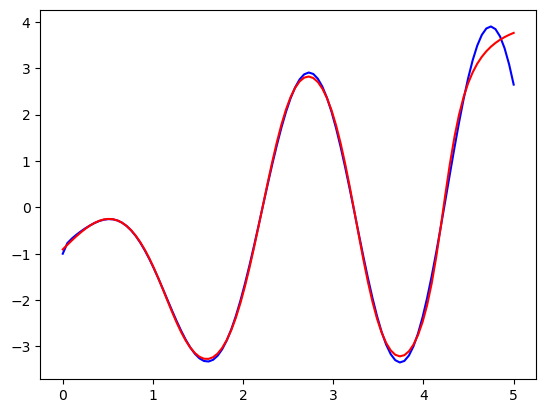

In [47]:
# Partie D. Visualisation
# Affichage de la fonction et de son approximation
Y_predict = modele.predict(X_train)
plt.plot(X_train, Y_train, color='blue')
plt.plot(X_train, Y_predict, color='red')
plt.show()

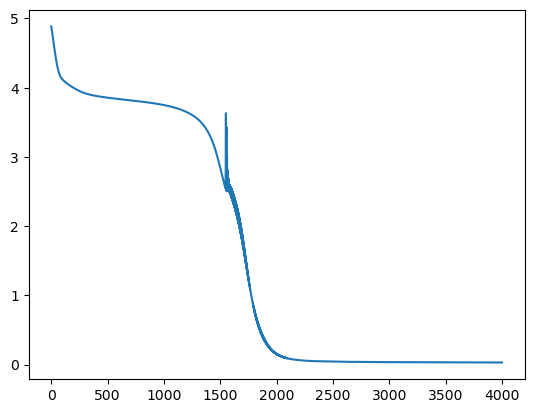

In [48]:
# Affichage de l'erreur au fil des époques
plt.plot(history.history['loss'])
plt.show()